# Pair Trading Strategy


In [1]:
import numpy as np
import pandas as pd

# !pip install yfinance networkx
import yfinance as yf

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6) # (18, 8)   # Change the size of plots
plt.style.use('fivethirtyeight')  
  
  
start = datetime.datetime(2022,1,1)
start = datetime.datetime(2022,5,4)
end = datetime.datetime(2022,6,17)
# end = datetime.date.today()
end

Populating the interactive namespace from numpy and matplotlib


datetime.datetime(2022, 6, 17, 0, 0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:>

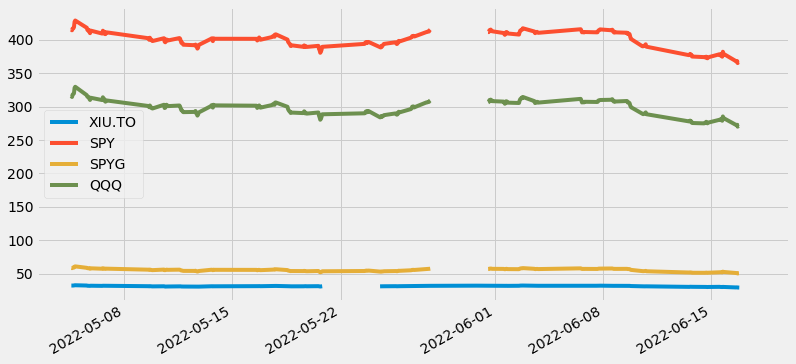

In [2]:
# // should add the ETFs: TIT and TEC 

# QQQJ is next Gen QQQ https://etfdb.com/etf/QQQJ/#holdings
# CLIX is ProShares Long Online/Short Stores ETF # https://etfdb.com/etf/CLIX/#holdings
# XLG is Invesco S&P 500 Top 50 ETF # https://etfdb.com/etf/XLG/#holdings
# ONLN is ProShares Online Retail ETF # https://etfdb.com/etf/ONLN/#holdings
# SKYY is First Trust Cloud Computing ETF # https://etfdb.com/etf/SKYY/#holdings
# MILN is Global X Millennial Consumer ETF #  https://etfdb.com/etf/MILN/#holdings
ls = ["SPYV", "SPY", "QQQ", "QQQJ", "CLIX", "ONLN", "SKYY", "MILN"]

ls = ['XIU.TO', 'SPY', 'SPYG', 'QQQ'] 

ETF = ls[0]
# ls  = list(set(ls))

data = {} # dict(SPY=yf.download(ETF, start, end, interval = '1h')["Adj Close"])
for i in ls:
  arry = yf.download(i, start, end, interval = '1h')
  data[i] = arry["Adj Close"]

stocks = pd.DataFrame(data)
stocks.plot(grid = True)

In [3]:
pd.DataFrame(np.sum(stocks.isna())).T
stocks.head(5)
stocks.shape
stocks.dropna(inplace=True)
stocks.shape


,XIU.TO,SPY,SPYG,QQQ
0,9,9,9,9


,XIU.TO,SPY,SPYG,QQQ
2022-05-04 13:30:00+00:00,32.029999,415.329987,58.310001,315.809998
2022-05-04 14:30:00+00:00,31.959999,414.339996,58.130001,314.513489
2022-05-04 15:30:00+00:00,32.029999,416.980011,58.730000,318.149994
2022-05-04 16:30:00+00:00,32.070000,417.350006,58.860001,319.100006
2022-05-04 17:30:00+00:00,32.160000,418.859985,59.009998,319.859985


(227, 4)

(210, 4)

<AxesSubplot:>

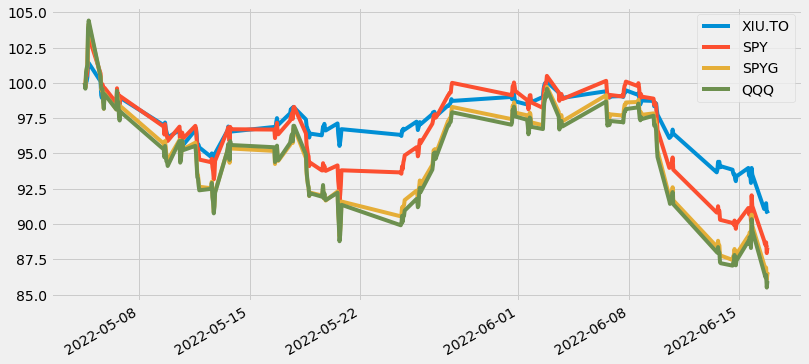

In [4]:
def scale_data(df):
  # mean norm  # normalized_df=(df-df.mean())/df.std()
   return (df-df.min())/(df.max()-df.min())*100
def shift_data(df):
  return (df/df.iloc[0])*100

stocks_ = shift_data(stocks)
stocks_.plot()
stocks = shift_data(stocks)
# stocks.plot()

## Simulate a 1:1 long-short strategy

In [5]:
# diff = stocks.iloc[:, 0] - stocks.iloc[:, 1]
# _=plt.title(f'What is you BOUGHT {ls[0]} and SHORT {ls[1]}')
# _=plt.plot(diff)
# _=plt.show()

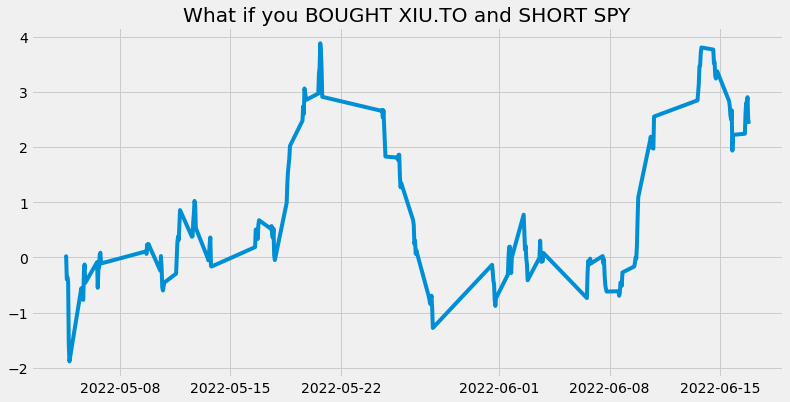

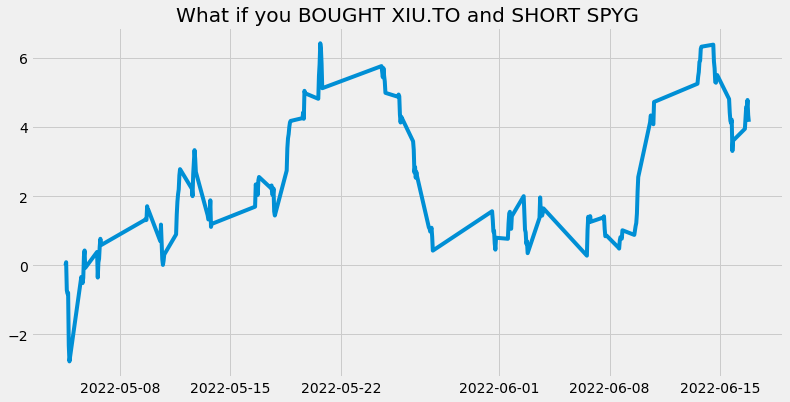

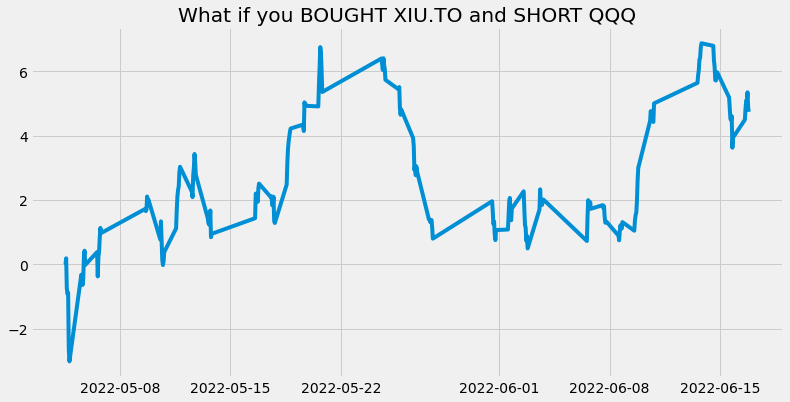

In [6]:
for i in range(stocks.shape[1]-1):
    diff = stocks.iloc[:, 0] - stocks.iloc[:, i+1]
    _=plt.title(f'What if you BOUGHT {ls[0]} and SHORT {ls[i+1]}')
    _=plt.plot(diff)
    _=plt.show()


In [7]:
# CLIX is ProShares Long Online/Short Stores ETF
# XLG is Invesco S&P 500 Top 50 ETF 
# ONLN is ProShares Online Retail ETF
# SKYY is First Trust Cloud Computing ETF
# MILN is Global X Millennial Consumer ETF

In [8]:
# stocks[['SPYV', 'SKYY']].plot() # 'SPY', 'QQQ',

## What if I cant short and want to used CAD to buy?

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,VFV.TO,XIU.TO,HIU.TO,HMJI.TO,BITI.TO
0,0,0,2,154,0


,VFV.TO,XIU.TO,HIU.TO,HMJI.TO,BITI.TO
2022-05-04 09:30:00-04:00,94.849998,32.029999,14.41,25.299999,14.26
2022-05-04 10:30:00-04:00,94.570000,31.959999,NaN,NaN,14.30
2022-05-04 11:30:00-04:00,95.110001,32.029999,14.43,NaN,14.07
2022-05-04 12:30:00-04:00,95.190002,32.070000,14.33,NaN,14.20
2022-05-04 13:30:00-04:00,95.449997,32.160000,14.30,NaN,14.15


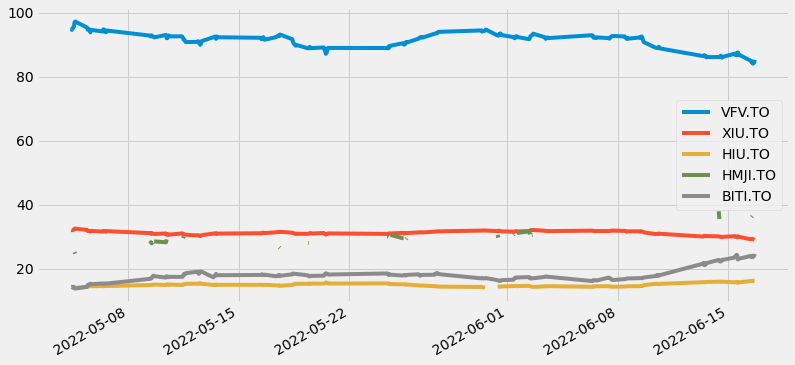

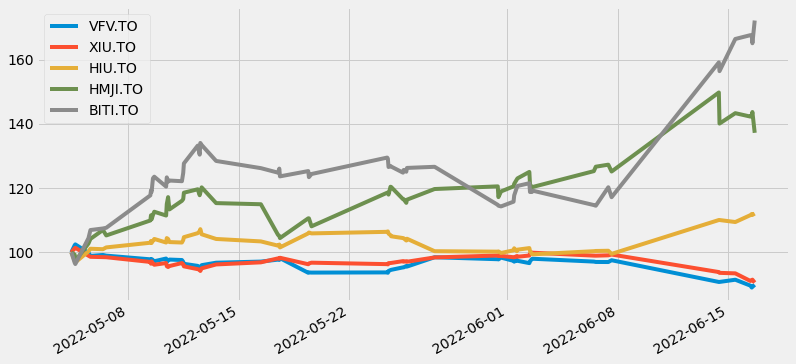

In [9]:
# HIX.TO is inv XIU.TO
# HIU.TO is inv SPY (VFV.TO)
# HMJI.TO is inv HMMJ, weed etf
# BITI.TO is inv Bitcoin https://www.horizonsetfs.com/ETF/BITI
ls = ['VFV.TO', 'XIU.TO', 'HIU.TO','HMJI.TO', 'BITI.TO'] # long TSX, short SPY, WEED, BTC
# ls = ['HIX.TO', 'VFV.TO','HMMJ.TO', 'HBIT.TO'] # Short TSX, long SPY, WEED, BTC

## 2X ETFS only
# ls = ['HSU.TO', # SPX 2x Daily Bull ETF
#       'HBU.TO', # Gold Bullion 2x Daily Bull ETF
#       'HZD.TO', # SILVER -2X DAILY BEAR ETF
#       'HQD.TO', # NASDAQ-100® -2X DAILY BEAR ETF
#       'HFD.TO', # S&P/TSX CAPPED FINANCIALS™ -2X DAILY BEAR ETF
#       # 'HUV.TO', # VIX short term futures 
#       ]


ETF = ls[0]
# ls  = list(set(ls))

data = {} # dict(SPY=yf.download(ETF, start, end, interval = '1h')["Adj Close"])
for i in ls:
  arry = yf.download(i, start, end, interval = '1h')
  data[i] = arry["Adj Close"]

stocks = pd.DataFrame(data)
_=stocks.plot(grid = True)

pd.DataFrame(np.sum(stocks.isna())).T
stocks.head(5)
stocks.dropna(inplace=True)
stocks = shift_data(stocks)
_=stocks.plot()

### Buying XIU and an inverse ETF

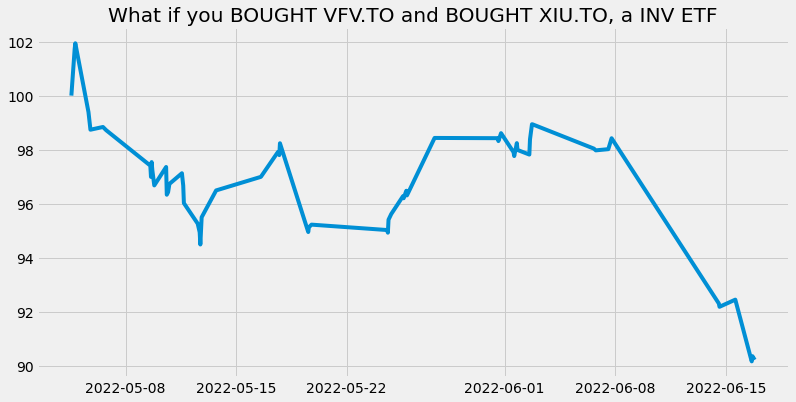

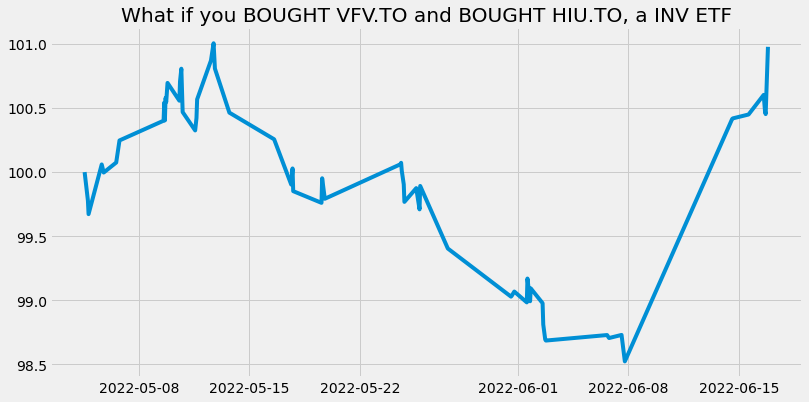

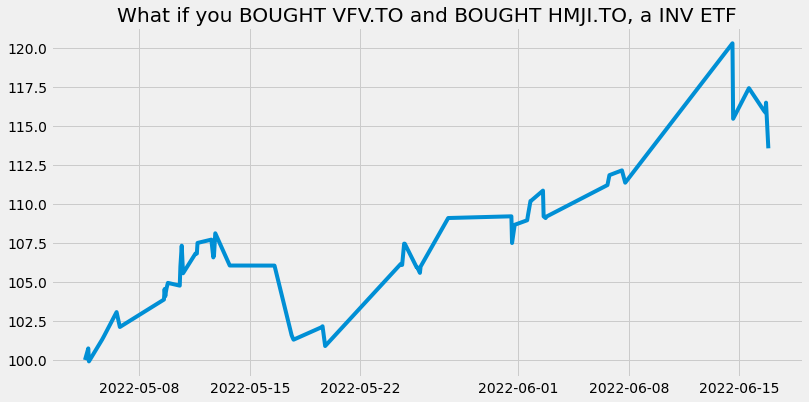

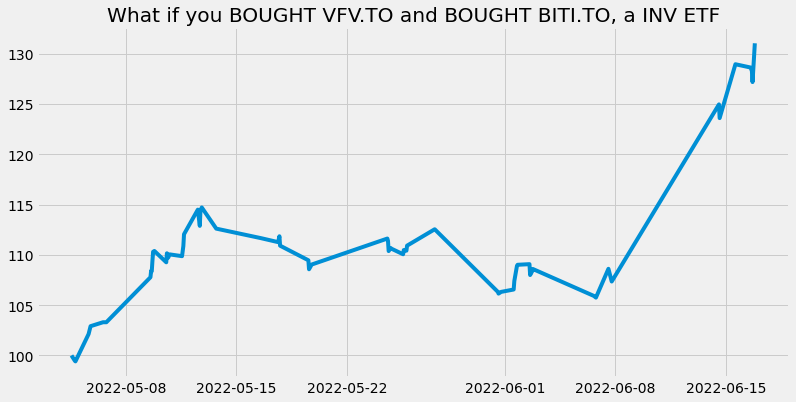

In [10]:
for i in range(stocks.shape[1]-1):
    diff = stocks.iloc[:, 0] + stocks.iloc[:, i+1]
    diff = shift_data(diff)
    _=plt.title(f'What if you BOUGHT {ls[0]} and BOUGHT {ls[i+1]}, a INV ETF')
    # _=plt.plot(stocks[['SPY']], color = 'k')
    _=plt.plot(diff)
    _=plt.show()


<AxesSubplot:>

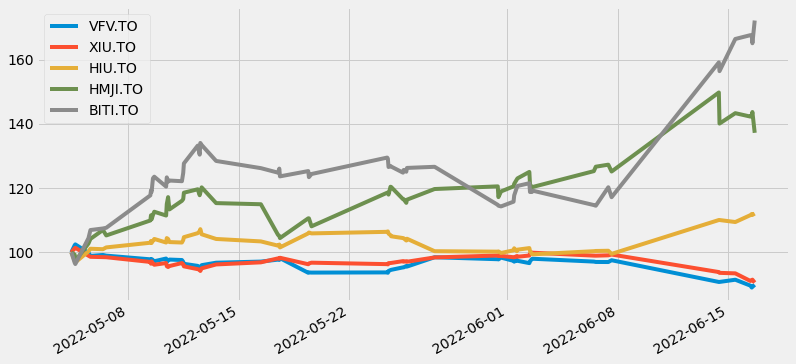

In [11]:
stocks.plot() # ['XIU.TO', 'HMJI.TO', 'BITI.TO']